# テストの続き

In [6]:
import pandas as pd
import numpy as np

#前処理済みのデータを持ってくる
df = pd.read_csv('./data/adult/adult_treated.csv', header=0,)

X = df.iloc[:,:-1]
#pd.to_csvで行数が１列目に入るので削除
X = X.drop('Unnamed: 0', axis=1)
y = df.iloc[:,[-1]]

#check the shape
print('----------------------------------------------------------------------------------------')
print('Raw shape: (%i,%i)' %df.shape)
print('X shape: (%i,%i)' %X.shape)
print('y shape: (%i,%i)' %y.shape)
print('----------------------------------------------------------------------------------------')
print(X.dtypes)
print('----------------------------------------------------------------------------------------')
print('Check the null count of the target variable: %i' % y.isnull().sum())
print('----------------------------------------------------------------------------------------')
X.join(y).head()

FileNotFoundError: File b'./data/adult/adult_treated.csv' does not exist

In [2]:
import pandas as pd

# import sample data
# Loan screening data for classification 
df_s = pd.read_csv('./data/adult/adult_test_treated.csv', header=0,)
X_s = df_s.iloc[:,:-1]
X_s = X_s.drop('Unnamed: 0', axis=1)
y_s = df_s.iloc[:,[-1]]

print('----------------------------------------------------------------------------------------')
print('Raw shape: (%i,%i)' %df_s.shape)
print('X_s shape: (%i,%i)' %X_s.shape)
print('y_s shape: (%i,%i)' %y_s.shape)
print(X_s.dtypes)

----------------------------------------------------------------------------------------
Raw shape: (16281,17)
X_s shape: (16281,15)
y_s shape: (16281,1)
Age                                  float64
Fnlwgt                               float64
Education_num                        float64
Capital_Gain                         float64
Capital_Loss                         float64
Hours_Per_Week                       float64
Workclass_Self-emp-not-inc           float64
Marital_Status_Married-civ-spouse    float64
Occupation_Exec-managerial           float64
Occupation_Farming-fishing           float64
Occupation_Other-service             float64
Occupation_Prof-specialty            float64
Occupation_Tech-support              float64
Relationship_Wife                    float64
Sex_Male                             float64
dtype: object


In [3]:
# import basice apis
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,r2_score

from skgarden.mondrian.ensemble import MondrianForestClassifier


# data Standardization
scaler = StandardScaler()
scaler.fit(X)
X_scl = scaler.transform(X)
X_s_scl = scaler.transform(X_s)

#set learning machine
rfc = RandomForestClassifier(random_state=42)
gbc = GradientBoostingClassifier(random_state=42)
mfc = MondrianForestClassifier()



次はtotalの計算時間を計算
ここでは、データが1000個ずつきて、順次学習していったと仮定する。

In [9]:
#各モデルのデータ数に対する計算速度を計測
import time
def calc_function(f, args):
    start = time.time()
    result = f(*args)
    end = time.time()
    return end-start

#全データ数をNを格納


def calc_time_plus_1000(X_use, y_use, larener):
    i = 0
    i_list = []
    time_list = []
    N = X_use.shape[0]
    calc_time_total = 0
    while i < N:
        i += 1000
        X_data = X_use[:i, :]    #
        y_data = y_use[:i]
        calc_time = calc_function(larener.fit,(X_data,y_data.as_matrix().ravel()) )
        i_list.append(i)
        calc_time_total += calc_time 
        time_list.append(calc_time_total)
    i_array = np.array(i_list)
    time_array = np.array(time_list)
    return i_array, time_array


In [ ]:
def calc_score_plus_1000(X_use, y_use, larener):
    i = 0
    i_list = []
    ac_list = []
    f1_list = []
    N = X_use.shape[0]
    while i < N:
        i += 100
        X_data = X_use[:i, :]    #データ数を大きくしてく
        y_data = y_use[:i]
        larener.fit(X_data, y_data.as_matrix().ravel())
        ac_sco = accuracy_score(y_s.as_matrix().ravel(), larener.predict(X_s_scl))
        f1_sco = f1_score(y_s.as_matrix().ravel(), larener.predict(X_s_scl))
        i_list.append(i)
        ac_list.append(ac_sco)
        f1_list.append(f1_sco)
    i_array = np.array(i_list)
    ac_array = np.array(ac_list)
    f1_array = np.array(f1_list)
    return i_array, ac_array, f1_array


In [42]:
result_rfc = calc_time_plus_1000(X_scl, y, rfc)
print('end')

end


In [11]:
result_gbc = calc_time_plus_1000(X_scl, y, gbc)
print('end')

end


In [12]:
result_mfc = calc_time_plus_1000(X_scl, y, mfc)
print('end')

end


In [59]:
#partial_fit でも同じ処理をする。

i = 0
i_list = []
time_list = []
N = X_scl.shape[0]
calc_time_total = 0
n = 0
while i < N:
    i += 1000
    X_data = X_scl[i-1000:i, :]    #次のデータで学習
    y_data = y[i-1000:i]
    calc_time = calc_function(mfc.partial_fit,(X_data,y_data.as_matrix().ravel()) )
    calc_time_total += calc_time
    
    n += X_data.shape[0]
    i_list.append(n)
    time_list.append(calc_time_total)
i_array = np.array(i_list)
time_array = np.array(time_list)

result_mfc_p = (i_array, time_array)
print('end')

end


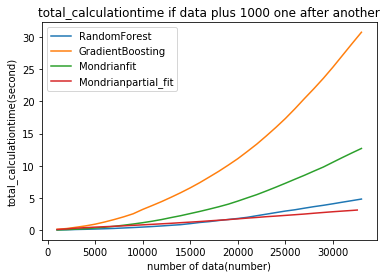

In [60]:
#データをプロットしてみる
%matplotlib inline
import matplotlib.pyplot as plt

def result_plot(result, name):
    x,y = result
    plt.plot(x, y, label=name)
result_plot(result_rfc, 'RandomForest')
result_plot(result_gbc, 'GradientBoosting')
result_plot(result_mfc, 'Mondrianfit')
result_plot(result_mfc_p, 'Mondrianpartial_fit')

plt.title('total_calculationtime if data plus 1000 one after another')
plt.xlabel('number of data(number)')
plt.ylabel('total_calculationtime(second)')
#凡例の表示
plt.legend()
# プロット表示(設定の反映)
plt.savefig('total_calculationtime if data plus 1000 one after another', dpi=500)
plt.show()


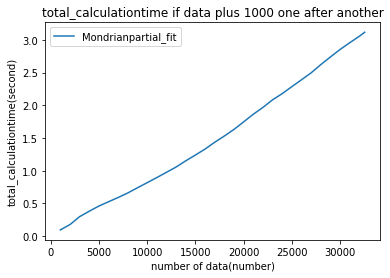

In [61]:
  #データをプロットしてみる
%matplotlib inline
import matplotlib.pyplot as plt

def result_plot(result, name):
    x,y = result
    plt.plot(x, y, label=name)

result_plot(result_mfc_p, 'Mondrianpartial_fit')

plt.title('total_calculationtime if data plus 1000 one after another')
plt.xlabel('number of data(number)')
plt.ylabel('total_calculationtime(second)')
#凡例の表示
plt.legend()
# プロット表示(設定の反映)
#plt.savefig('calculationtime of each laerner', dpi=500)
plt.show()

次はデータが100個ずつ来たと仮定する。

In [25]:
#各モデルのデータ数に対する計算速度を計測
import time
def calc_function(f, args):
    start = time.time()
    result = f(*args)
    end = time.time()
    return end-start

#全データ数をNを格納


def calc_time_plus_100(X_use, y_use, larener):
    i = 0
    i_list = []
    time_list = []
    N = X_use.shape[0]
    calc_time_total = 0
    while i < N:
        i += 100
        X_data = X_use[:i, :]    #
        y_data = y_use[:i]
        calc_time = calc_function(larener.fit,(X_data,y_data.as_matrix().ravel()) )
        i_list.append(i)
        calc_time_total += calc_time 
        time_list.append(calc_time_total)
    i_array = np.array(i_list)
    time_array = np.array(time_list)
    return i_array, time_array


In [26]:
result_rfc_100 = calc_time_plus_100(X_scl, y, rfc)
print('end')

end


In [27]:
result_gbc_100 = calc_time_plus_100(X_scl, y, gbc)
print('end')

end


In [33]:
result_mfc_100 = calc_time_plus_100(X_scl, y, mfc)
print('end')

end


In [65]:
#partial_fit でも同じ処理をする。

i = 0
i_list = []
time_list = []
N = X_scl.shape[0]
calc_time_total = 0
n = 0
while i < N:
    i += 100
    X_data = X_scl[i-100:i, :]    #次のデータで学習
    y_data = y[i-100:i]
    calc_time = calc_function(mfc.partial_fit,(X_data,y_data.as_matrix().ravel()) )
    calc_time_total += calc_time
    
    n += X_data.shape[0]
    i_list.append(n)
    time_list.append(calc_time_total)
i_array = np.array(i_list)
time_array = np.array(time_list)

result_mfc_p_100 = (i_array, time_array)
print('end')

end


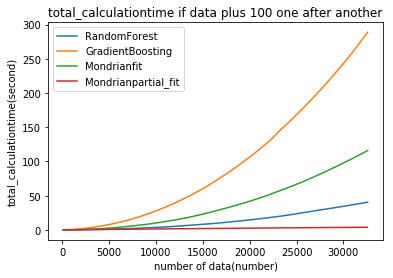

In [66]:
#データをプロットしてみる
%matplotlib inline
import matplotlib.pyplot as plt

def result_plot(result, name):
    x,y = result
    plt.plot(x, y, label=name)
result_plot(result_rfc_100, 'RandomForest')
result_plot(result_gbc_100, 'GradientBoosting')
result_plot(result_mfc_100, 'Mondrianfit')
result_plot(result_mfc_p_100, 'Mondrianpartial_fit')

plt.title('total_calculationtime if data plus 100 one after another')
plt.xlabel('number of data(number)')
plt.ylabel('total_calculationtime(second)')
#凡例の表示
plt.legend()
# プロット表示(設定の反映)
plt.savefig('total_calculationtime if data plus 100 one after another', dpi=500)
plt.show()


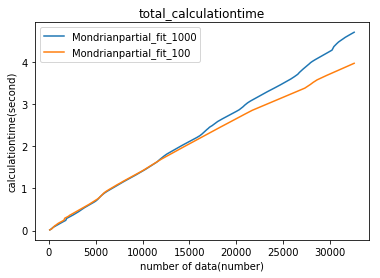

In [67]:
#データをプロットしてみる
%matplotlib inline
import matplotlib.pyplot as plt

def result_plot(result, name):
    x,y = result
    plt.plot(x, y, label=name)

result_plot(result_mfc_p, 'Mondrianpartial_fit_1000')
result_plot(result_mfc_p_100,'Mondrianpartial_fit_100')
plt.title('total_calculationtime')
plt.xlabel('number of data(number)')
plt.ylabel('calculationtime(second)')
#凡例の表示
plt.legend()
# プロット表示(設定の反映)
#plt.savefig('total_calculationtime of Mondrian', dpi=500)
plt.show()

次に、1個ずつ足していった場合、10個、100個といった場合のtotaltimeを比較する。

In [68]:
#partial_fit でも同じ処理をする。

i = 0
i_list = []
time_list = []
N = X_scl.shape[0]
calc_time_total = 0
n = 0
while i < N:
    i += 1
    X_data = X_scl[i-1:i, :]    #次のデータで学習
    y_data = y[i-1:i]
    calc_time = calc_function(mfc.partial_fit,(X_data,y_data.as_matrix().ravel()) )
    calc_time_total += calc_time
    
    n += X_data.shape[0]
    i_list.append(n)
    time_list.append(calc_time_total)
i_array = np.array(i_list)
time_array = np.array(time_list)

result_mfc_p_1 = (i_array, time_array)
print('end')

end


In [69]:
#partial_fit でも同じ処理をする。

i = 0
i_list = []
time_list = []
N = X_scl.shape[0]
calc_time_total = 0
n = 0
while i < N:
    i += 10
    X_data = X_scl[i-10:i, :]    #次のデータで学習
    y_data = y[i-10:i]
    calc_time = calc_function(mfc.partial_fit,(X_data,y_data.as_matrix().ravel()) )
    calc_time_total += calc_time
    
    n += X_data.shape[0]
    i_list.append(n)
    time_list.append(calc_time_total)
i_array = np.array(i_list)
time_array = np.array(time_list)

result_mfc_p_10 = (i_array, time_array)
print('end')

end


In [72]:
#partial_fit でも同じ処理をする。

i = 0
i_list = []
time_list = []
N = X_scl.shape[0]
calc_time_total = 0
n = 0
while i < N:
    i += 10000
    X_data = X_scl[i-10000:i, :]    #次のデータで学習
    y_data = y[i-10000:i]
    calc_time = calc_function(mfc.partial_fit,(X_data,y_data.as_matrix().ravel()) )
    calc_time_total += calc_time
    
    n += X_data.shape[0]
    i_list.append(n)
    time_list.append(calc_time_total)
i_array = np.array(i_list)
time_array = np.array(time_list)

result_mfc_p_10000 = (i_array, time_array)
print('end')

end


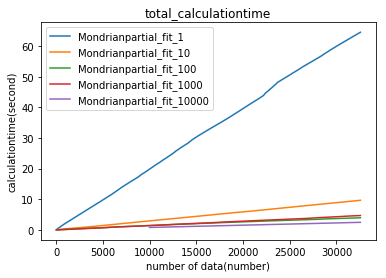

In [73]:
#データをプロットしてみる
%matplotlib inline
import matplotlib.pyplot as plt

def result_plot(result, name):
    x,y = result
    plt.plot(x, y, label=name)
result_plot(result_mfc_p_1,'Mondrianpartial_fit_1')    
result_plot(result_mfc_p_10,'Mondrianpartial_fit_10')
result_plot(result_mfc_p_100,'Mondrianpartial_fit_100')
result_plot(result_mfc_p, 'Mondrianpartial_fit_1000')
result_plot(result_mfc_p_10000,'Mondrianpartial_fit_10000')
plt.title('total_calculationtime')
plt.xlabel('number of data(number)')
plt.ylabel('calculationtime(second)')
#凡例の表示
plt.legend(loc='upper left')
# プロット表示(設定の反映)
plt.savefig('total_calculationtime of Mondrian1', dpi=500)
plt.show()

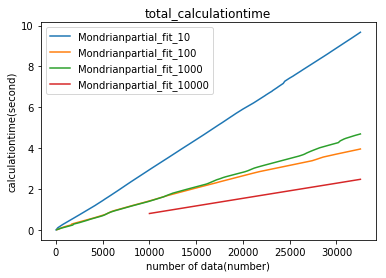

In [74]:
#データをプロットしてみる
%matplotlib inline
import matplotlib.pyplot as plt

def result_plot(result, name):
    x,y = result
    plt.plot(x, y, label=name)
 
result_plot(result_mfc_p_10,'Mondrianpartial_fit_10')
result_plot(result_mfc_p_100,'Mondrianpartial_fit_100')
result_plot(result_mfc_p, 'Mondrianpartial_fit_1000')
result_plot(result_mfc_p_10000,'Mondrianpartial_fit_10000')
plt.title('total_calculationtime')
plt.xlabel('number of data(number)')
plt.ylabel('calculationtime(second)')
#凡例の表示
plt.legend(loc='upper left')
# プロット表示(設定の反映)
plt.savefig('total_calculationtime of Mondrian2', dpi=500)
plt.show()